<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/28_Accurate_Prediction_of_Medical_Insurance_Prices_using_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **28.Accurate Prediction of Medical Insurance Prices using Machine Learning in Python**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load data**

In [ ]:
data = pd.read_csv('/content/insurance.csv')

**Plot all data points in the dataset**

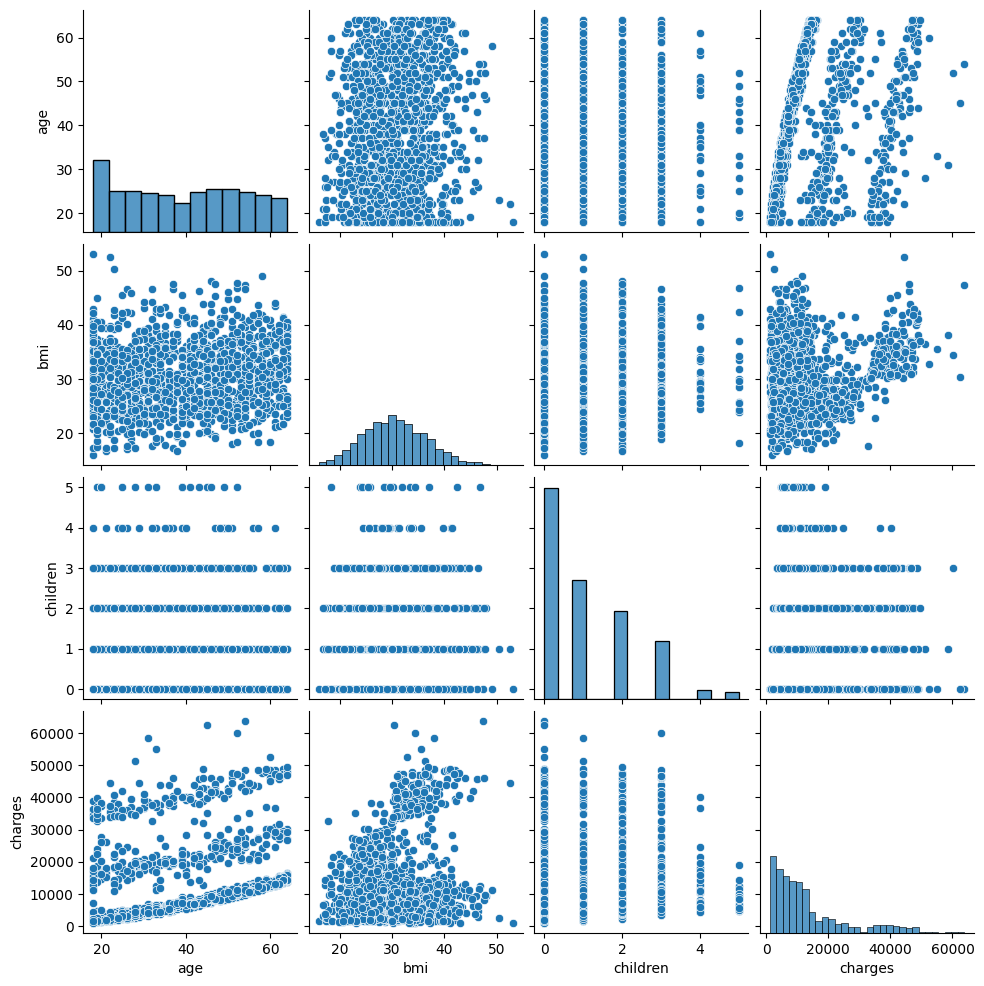

In [ ]:
sns.pairplot(data)
plt.show()

**Exploreing The Data**

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

**Data Preprocessing**

In [ ]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

In [ ]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
data.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


**Split the dataset into train and test sets**

In [ ]:
X = data.drop('charges', axis=1)
y = data['charges']

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Plot train and test data**

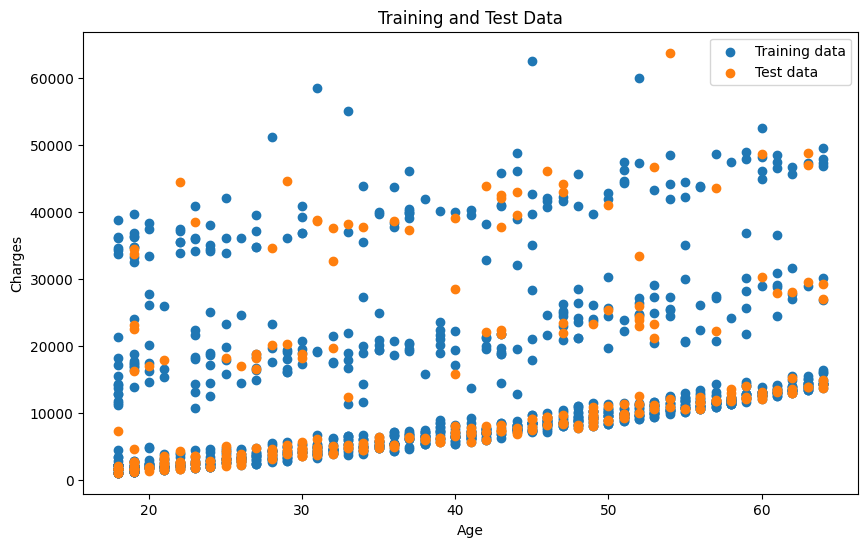

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['age'], y_train, label='Training data')
plt.scatter(X_test['age'], y_test, label='Test data')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Training and Test Data')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

**Plot training efficiency of the model**

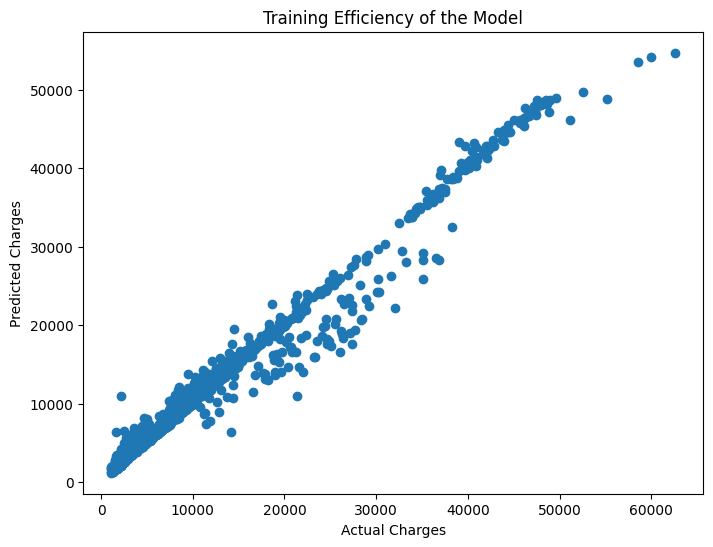

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_train, model.predict(X_train_scaled), 'o')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Training Efficiency of the Model')
plt.show()

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

**Test the model and plot testing efficiency**

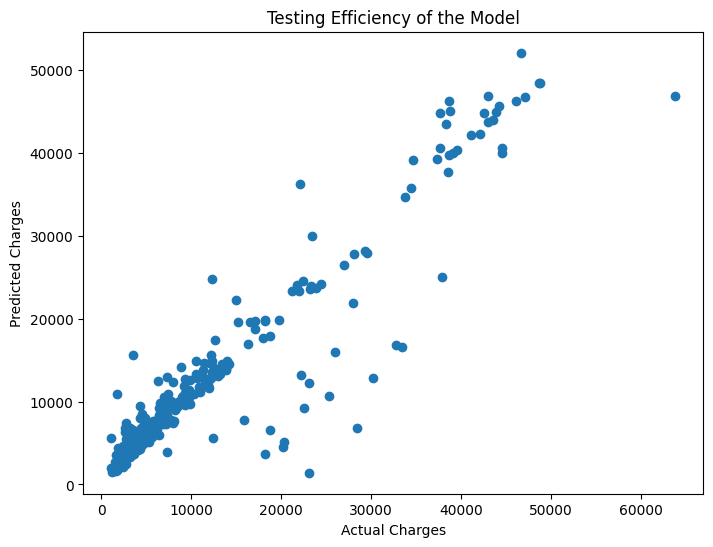

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Testing Efficiency of the Model')
plt.show()

In [ ]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2541.614593844528


In [ ]:
mse = mean_squared_error(y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21003637.60876614


In [ ]:
rmse = mean_squared_error(y_test, predictions, squared=False)

In [ ]:
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4582.9725734250405


**Calculate overall model efficiency and print**

In [ ]:
overall_efficiency = model.score(X_test_scaled, y_test)
print(f"Overall Model Efficiency: {overall_efficiency}")

Overall Model Efficiency: 0.8647097634425496


**Plot overall efficiency of the model**

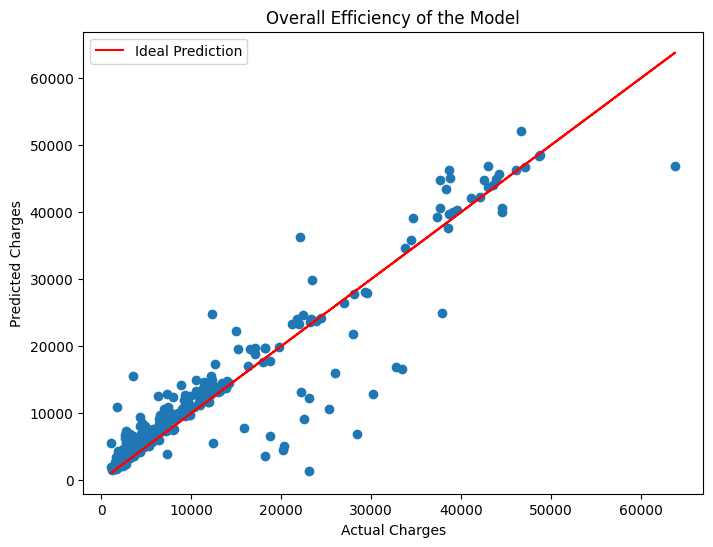

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, predictions, 'o')
plt.plot(y_test, y_test, 'r-', label='Ideal Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Overall Efficiency of the Model')
plt.legend()
plt.show()